c:\Users\xinxi\ComputerVision\cv-course15\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


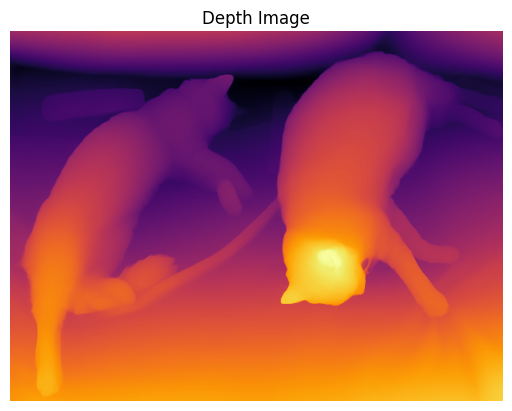

In [2]:
from transformers import pipeline
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt

# load pipe
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# inference
depth = pipe(image)["depth"]

# Convert to numpy array
depth_array = np.array(depth)


# Normalize for visualization
depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

# Save depth image
plt.imsave("depth_image.png", depth_normalized, cmap='inferno')

# Display in notebook
plt.imshow(depth_normalized, cmap='inferno')
plt.axis('off')  # Optional: hides axis ticks
plt.title("Depth Image")
plt.show()
